In [9]:
from numpy import genfromtxt
from sklearn.model_selection import train_test_split
# url1 = 'http://mlr.cs.umass.edu/ml/machine-learning-databases/'
# url2 = 'breast-cancer-wisconsin/'
# name = 'wdbc.data'
data = genfromtxt('C:/users/memdp/Python_Playground/text_files/wdbc.data', delimiter=',', dtype=str)

y = data[:, 1] # responses
X = data[:, 2:].astype('float') # features as an ndarray matrix

In [5]:
from urllib.request import urlopen



URLError: <urlopen error [Errno 11001] getaddrinfo failed>

In [10]:
y.shape

(569,)

In [8]:
X.shape

(569, 30)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,
                                                    random_state=1234)

In [12]:
print(X_train.shape)
print(X_test.shape)

(341, 30)
(228, 30)


<ipython-input-32-8f932e868865>:11: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection = '3d')


Text(0.5, 0, 'Mean Concavity')

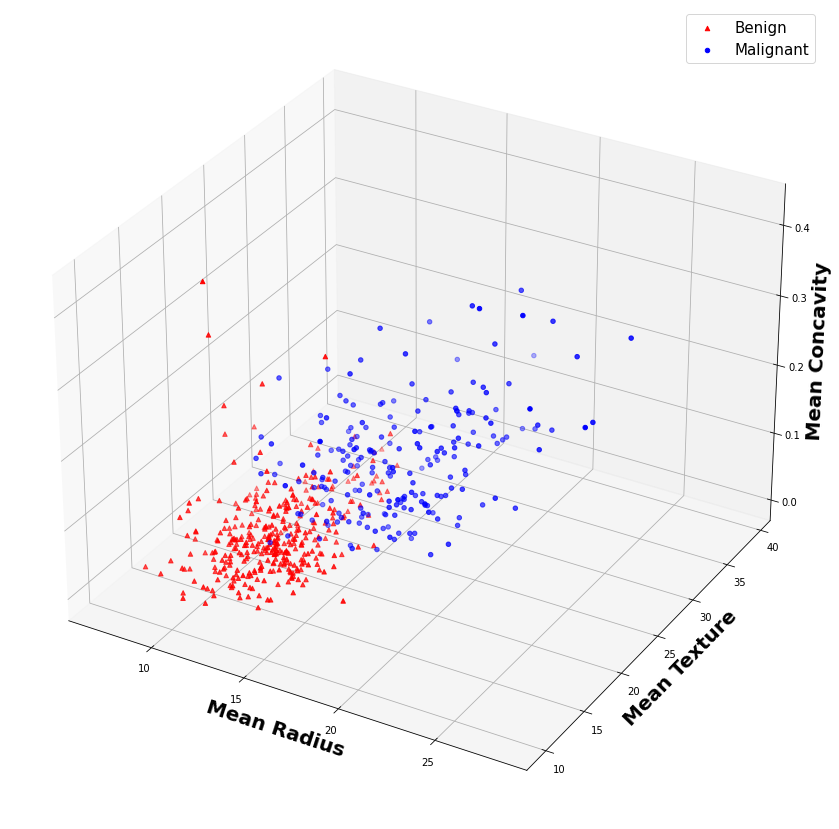

In [32]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

Bidx = np.where(y == 'B')
Midx = np.where(y == 'M')

# plot features Radius (column 0), Texture (1), Concavity (6)

fig = plt.figure(figsize=(15,15))
ax = fig.gca(projection = '3d')
ax.scatter(X[Bidx, 0], X[Bidx, 1], X[Bidx, 6],
           c='r', marker='^', label='Benign')
ax.scatter(X[Midx, 0], X[Midx, 1], X[Midx, 6],
           c='b', marker='o', label='Malignant')
ax.legend(fontsize= 15)
ax.set_xlabel('Mean Radius', fontdict = {'fontsize': 20, 'fontweight': 1000})
ax.set_ylabel('Mean Texture', fontdict = {'fontsize': 20, 'fontweight': 1000})
ax.set_zlabel('Mean Concavity', fontdict = {'fontsize': 20, 'fontweight': 1000})

In [33]:
from sklearn.metrics import accuracy_score

import sklearn.discriminant_analysis as DA
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

names = ['Logit', 'NBayes', 'LDA', 'QDA', 'KNN', 'SVM']

classifiers = [LogisticRegression(C=1e5),
               GaussianNB(),
               DA.LinearDiscriminantAnalysis(),
               DA.QuadraticDiscriminantAnalysis(),
               KNeighborsClassifier(n_neighbors=5),
               SVC(kernel='rbf', gamma=1e-4)]

print('Name  Accuracy\n'+14*'-')
for name, clf in zip(names, classifiers):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print('{:6} {:3.3f}'.format(name, accuracy_score(y_test, y_pred)))

Name  Accuracy
--------------
Logit  0.925
NBayes 0.908
LDA    0.943
QDA    0.956
KNN    0.925
SVM    0.939


c:\python\python385\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<ipython-input-58-d00627cfcb2a>:14: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d',)


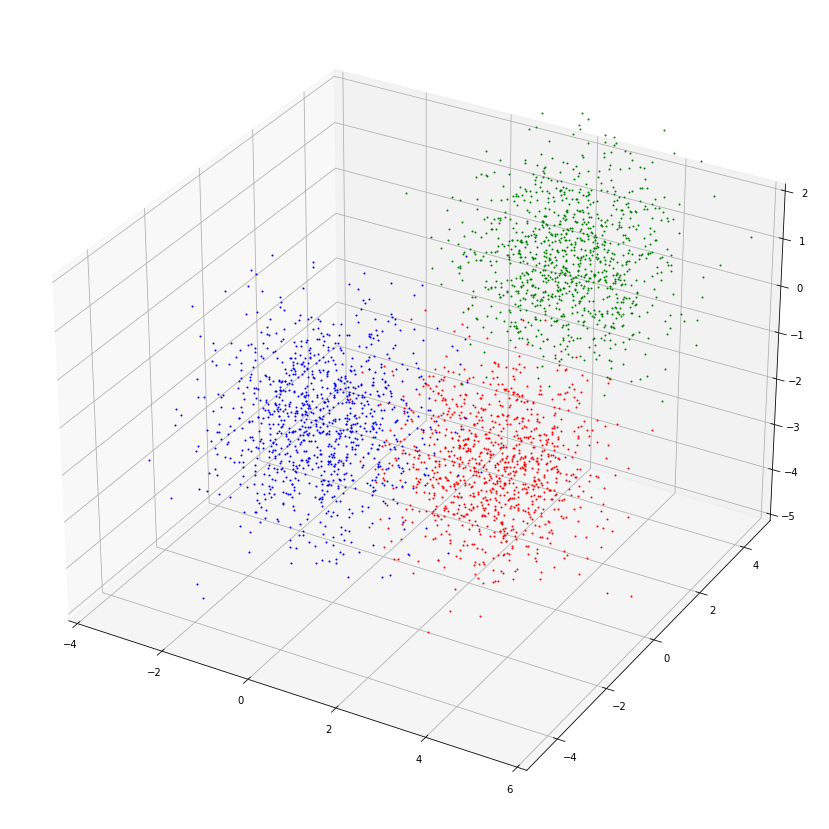

In [58]:
import numpy as np
from numpy.random import randn
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

n=1000
mu1 = np.array([2, 1, -3])
mu2 = np.array([1, -4, 0])
mu3 = np.array([2, 4, 0])
X1 = randn(n, 3) + mu1
X2 = randn(n, 3) + mu2
X3 = randn(n, 3) + mu3
fig = plt.figure(figsize=(15,15))
ax = fig.gca(projection='3d',)
ax.plot(X1[:, 0], X1[:, 1], X1[:, 2], 'r.', alpha=1, markersize=2)
ax.plot(X2[:, 0], X2[:, 1], X2[:, 2], 'b.', alpha=1, markersize=2)
ax.plot(X3[:, 0], X3[:, 1], X3[:, 2], 'g.', alpha=1, markersize=2)
ax.set_xlim3d(-4, 6)
ax.set_ylim3d(-5, 5)
ax.set_zlim3d(-5, 2)
plt.show()

In [61]:
from numpy.linalg import svd, pinv

mu21 = (mu2 - mu1).reshape(3, 1)
mu31 = (mu3 - mu1).reshape(3, 1)

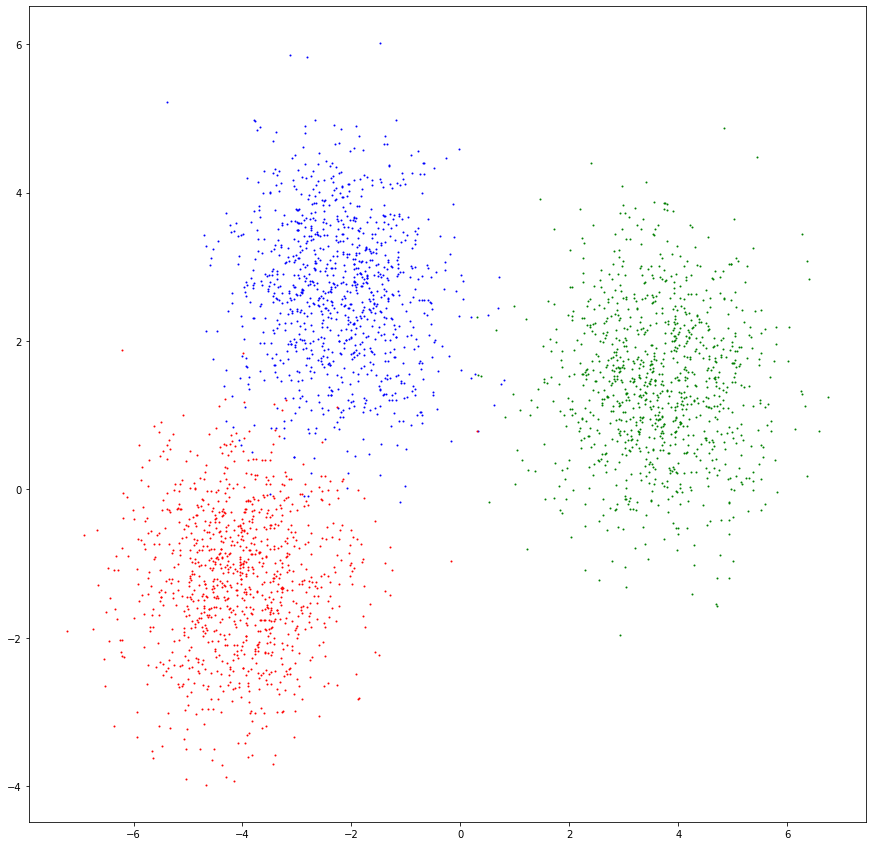

In [71]:
W = np.hstack((mu21, mu31))
U, _, _ = svd(W)
P = W @ pinv(W)
R = U.T @ P

RX1 = (R @ X1.T).T
RX2 = (R @ X2.T).T
RX3 = (R @ X3.T).T
plt.figure(figsize=(15,15))
plt.plot(RX1[:, 0], RX1[:, 1], 'b.', alpha=1, markersize=2)
plt.plot(RX2[:, 0], RX2[:, 1], 'g.', alpha=1, markersize=2)
plt.plot(RX3[:, 0], RX3[:, 1], 'r.', alpha=1, markersize=2)